<a href="https://colab.research.google.com/github/semenjons/151122git_comands/blob/555got/%D0%93%D0%B0%D1%80%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D0%98%2C%D0%98_3_%D1%83%D1%80%D0%BE%D0%BA_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from __future__ import absolute_import,division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## Импортируем Fashion MNIST датасет

In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

4422102/4422102 [==============================] - 1s 0us/step


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета

Давайте посмотрим структуры полученного массива данных:

In [4]:
train_images.shape

(60000, 784)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [7]:
test_images.shape

(10000, 784)

In [8]:
len(test_labels)

10000

In [9]:
test_images[0].shape

(784,)

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [10]:
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [11]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [12]:
hist = model.fit(train_images, train_labels, batch_size = 250, epochs=50)

Epoch 1/50
240/240 [==============================] - 7s 4ms/step - loss: 0.5699 - accuracy: 0.8011
Epoch 2/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3663 - accuracy: 0.8665
Epoch 3/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8780
Epoch 4/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3051 - accuracy: 0.8867
Epoch 5/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2844 - accuracy: 0.8949
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2716 - accuracy: 0.8992
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2544 - accuracy: 0.9051
Epoch 8/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2476 - accuracy: 0.9077
Epoch 9/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.9137
Epoch 10/50
240/240 [==============================] - 1s 5ms/step - loss: 0.2260 - accuracy: 0.9149

In [13]:
import tensorflow as tf

In [14]:
print(tf.config.experimental.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4967 - accuracy: 0.8911 - 904ms/epoch - 3ms/step

Test accuracy: 0.8910999894142151


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiden_one (Dense)           (None, 256)               200960    
                                                                 
 hiden_two (Dense)           (None, 128)               32896     
                                                                 
 hiden_three (Dense)         (None, 64)                8256      
                                                                 
 hiden_four (Dense)          (None, 64)                4160      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 246,922
Trainable params: 246,922
Non-trainable params: 0
_________________________________________________________________


In [18]:
type(model.get_weights())

list

In [19]:
len(model.get_weights())

10

In [20]:
model.get_weights()[3].shape

(128,)

В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети -

In [21]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [23]:
predictions[0]

array([1.1098470e-08, 8.6436627e-09, 1.7987837e-13, 1.3568012e-10,
       1.9561970e-08, 4.5999801e-07, 1.8244403e-12, 2.1267686e-05,
       2.2143785e-09, 9.9997818e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

In [27]:
test_images.shape

(10000, 784)

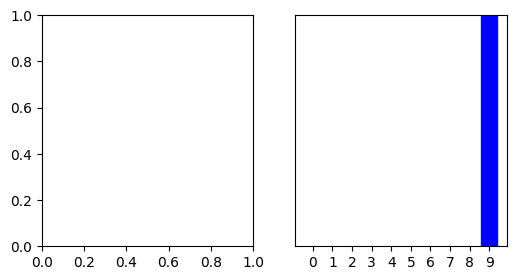

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

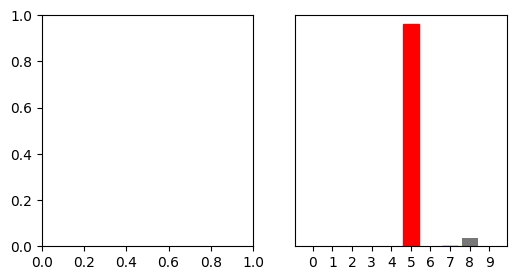

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний -

In [30]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
#for i in range(num_images):
 # plt.subplot(num_rows, 2*num_cols, 2*i+1)
  #plot_image(i, predictions[i], test_labels, test_images)
  #plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #lot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети -

In [34]:
img = test_images[1]

print(img.shape)

(784,)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 784)


In [36]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[2.1742025e-04 5.6824190e-10 9.9547762e-01 1.5275475e-07 4.3027210e-03
  1.2297317e-11 2.1213209e-06 1.1401890e-08 1.0099626e-08 9.0867079e-12]]


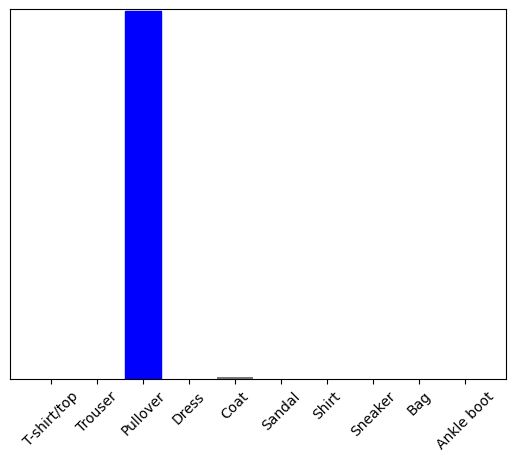

In [37]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [38]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

> Indented block



## Практическое задание

<ol>
    <li> Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST.
    <li> Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    <li> Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке
    <li>* Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.
    </li>
</ol>